1. Analysis of Employee Salary by Job Title and Size of the Company(Large,Medium and Small).
2. Compare Salaries in US and Across Nation by size of company(Large,Medium and Small)

Analysis Results:
1. Analytics Manager's and Data Science Lead positions are highly paid.
2. Comparing Salaries by company size, Across all nations Medium Size companies average Salary is more.
3. US Companies compared Non-US companies are paying well. Even Small Companies of US pay more compared to all Non-US comanies.

Conlusion: Higher Pay Scale is observed in US Large comanies. 


In [4]:
# Dependencies
import json
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress

# Load JSON
filepath = Path("Resources/salaries.json")
with open(filepath) as jsonfile:
    salaries_json = json.load(jsonfile)

#Explore json payload
salaries_json[0]

{'work_year': '2023',
 'experience_level': 'SE',
 'employment_type': 'FT',
 'job_title': 'Data Scientist',
 'salary': '199000',
 'salary_currency': 'USD',
 'salary_in_usd': '199000',
 'employee_residence': 'US',
 'remote_ratio': 0,
 'company_location': 'US',
 'company_size': 'M'}

In [5]:
# Create a Data Frame and Explore Data  
df = pd.DataFrame.from_records(salaries_json)
#Find Columns and their data types in raw data
df.info()
#Explore data
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8113 entries, 0 to 8112
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           8113 non-null   object
 1   experience_level    8113 non-null   object
 2   employment_type     8113 non-null   object
 3   job_title           8113 non-null   object
 4   salary              8113 non-null   object
 5   salary_currency     8113 non-null   object
 6   salary_in_usd       8113 non-null   object
 7   employee_residence  8113 non-null   object
 8   remote_ratio        8113 non-null   int64 
 9   company_location    8113 non-null   object
 10  company_size        8113 non-null   object
dtypes: int64(1), object(10)
memory usage: 697.3+ KB


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Data Scientist,199000,USD,199000,US,0,US,M
1,2023,SE,FT,Data Scientist,196760,USD,196760,US,0,US,M
2,2023,SE,FT,Machine Learning Engineer,90000,USD,90000,CO,0,CO,M
3,2023,SE,FT,Machine Learning Engineer,70000,USD,70000,CO,0,CO,M
4,2023,SE,FT,ML Engineer,324000,USD,324000,US,0,US,M


In [6]:
# Modofy Salary to float from object and round Salary field upto 2 decimals
df[["salary_in_usd","salary"]] = df[["salary_in_usd","salary"]].astype(float)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8113 entries, 0 to 8112
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           8113 non-null   object 
 1   experience_level    8113 non-null   object 
 2   employment_type     8113 non-null   object 
 3   job_title           8113 non-null   object 
 4   salary              8113 non-null   float64
 5   salary_currency     8113 non-null   object 
 6   salary_in_usd       8113 non-null   float64
 7   employee_residence  8113 non-null   object 
 8   remote_ratio        8113 non-null   int64  
 9   company_location    8113 non-null   object 
 10  company_size        8113 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 697.3+ KB


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Data Scientist,199000.0,USD,199000.0,US,0,US,M
1,2023,SE,FT,Data Scientist,196760.0,USD,196760.0,US,0,US,M
2,2023,SE,FT,Machine Learning Engineer,90000.0,USD,90000.0,CO,0,CO,M
3,2023,SE,FT,Machine Learning Engineer,70000.0,USD,70000.0,CO,0,CO,M
4,2023,SE,FT,ML Engineer,324000.0,USD,324000.0,US,0,US,M


In [7]:
#Check for Null Values in Data
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [8]:
#Average Earning by Position Title
bytitles =  df.groupby("job_title")
sal_range = bytitles.mean("salary_in_usd")["salary_in_usd"].reset_index()
sal_range['salary_in_usd'] = sal_range['salary_in_usd'].round(2)
sal_range = sal_range.sort_values("salary_in_usd" , ascending  = False)
sal_range.head()

,job_title,salary_in_usd
8,Analytics Engineering Manager,399880.0
62,Data Science Tech Lead,375000.0
100,Managing Director Data Science,300000.0
6,AWS Data Architect,258000.0
0,AI Architect,255193.6


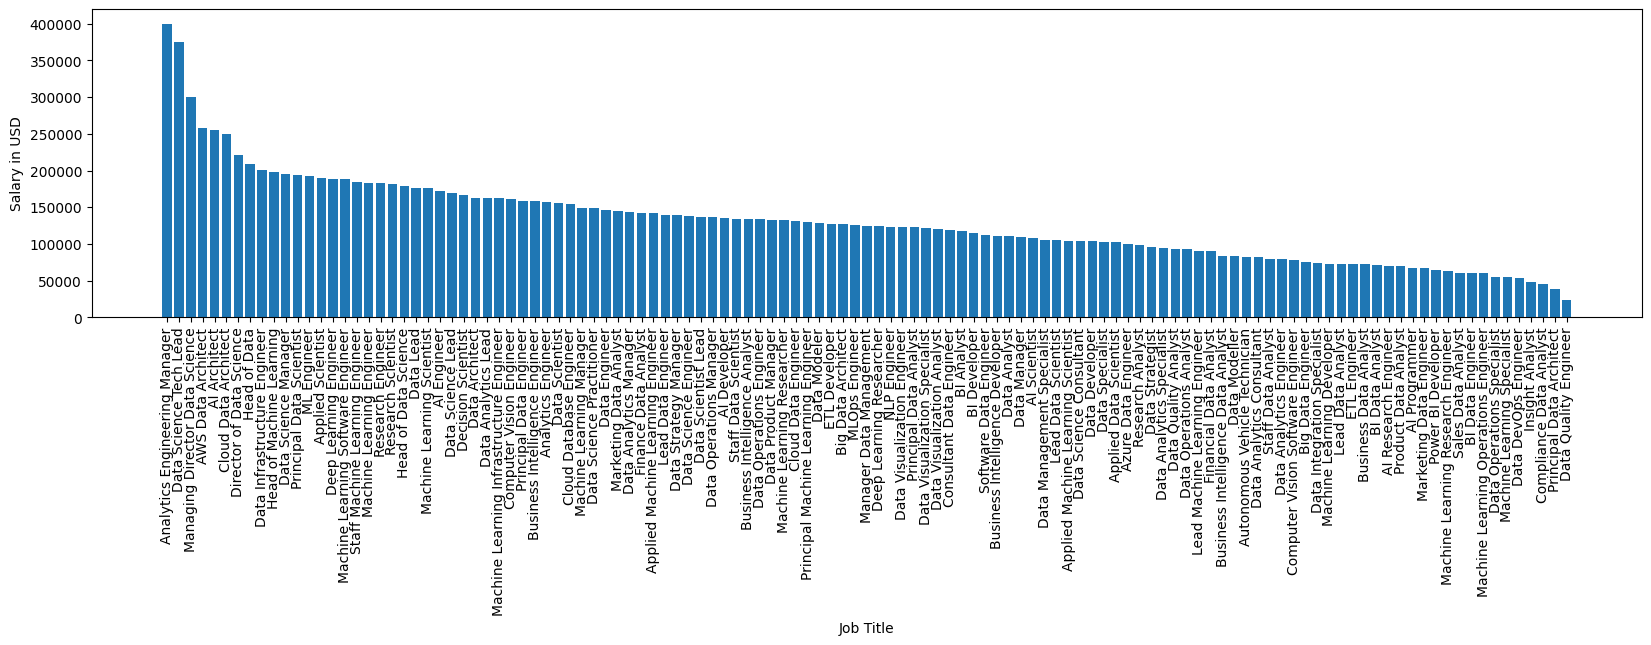

<Figure size 640x480 with 0 Axes>

In [9]:
# Plot Bar Chart Job Title Vs Salary
# sal_range.plot(kind = 'bar', xlabel = "job_title", ylabel = "Salary", figsize = (20,4))

y_axis = sal_range["salary_in_usd"]
x_axis = sal_range["job_title"]
tick_locations = [value for value in x_axis]
plt.figure(figsize = (20,4))

plt.bar(x_axis, y_axis,linewidth=2)
plt.xticks(tick_locations, x_axis, rotation = "vertical")
plt.xlabel("Job Title")
plt.ylabel("Salary in USD")
# Save the figure
plt.savefig("Images/Fig1.png")

plt.show()
plt.tight_layout()



In [10]:
#Salary BY Company Size across all nations
by_cmop_size = df.replace({"company_size": {'L': 'Large', 'M': 'Medium', 'S': 'Small'}}).groupby("company_size")
comp_size_df = by_cmop_size.mean("salary_in_usd")["salary_in_usd"].round(2).reset_index()
comp_size_df = comp_size_df.sort_values("salary_in_usd" , ascending  = False)
# comp_size_df = comp_size_df.set_index('company_size')
comp_size_df

,company_size,salary_in_usd
1,Medium,152249.96
0,Large,133531.35
2,Small,88556.62


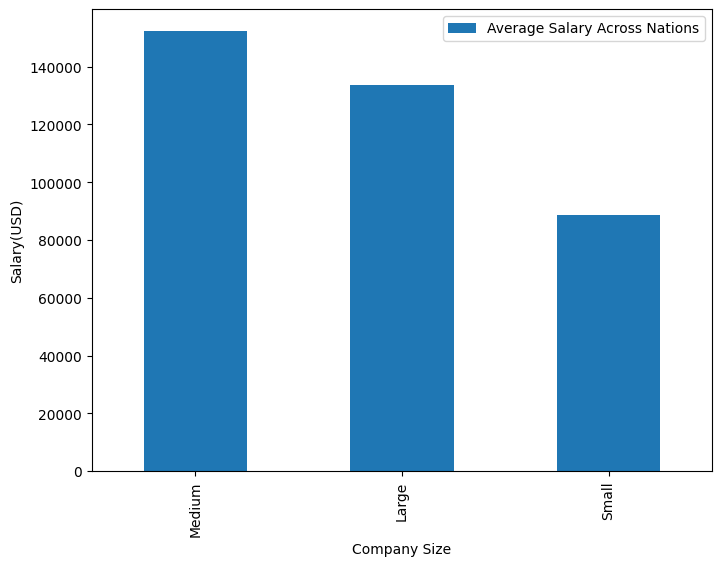

In [11]:
#Average Salary across all nations Paid by Size of Organizations
fig, ax = plt.subplots()
comp_size_df.set_index('company_size').plot(kind = 'bar', ax = ax, xlabel = "company_size", ylabel = "salary_in_usd", figsize = (8,6))
ax.legend(["Average Salary Across Nations"])
ax.set(xlabel='Company Size', ylabel='Salary(USD)')

# Save the figure
fig.savefig("Images/Fig2.png")


In [12]:
# Compare Salaries in US by Company Size
us_df  = df[df['company_location'] == 'US']
by_cmop_size_us = us_df.replace({"company_size": {'L': 'Large', 'M': 'Medium', 'S': 'Small'}}).groupby("company_size")
comp_size_df_us = by_cmop_size_us.mean("salary_in_usd")["salary_in_usd"].round(2).reset_index()
comp_size_df_us = comp_size_df_us.sort_values("salary_in_usd" , ascending  = False)
comp_size_df_us

,company_size,salary_in_usd
0,Large,161974.45
1,Medium,158835.53
2,Small,115082.27


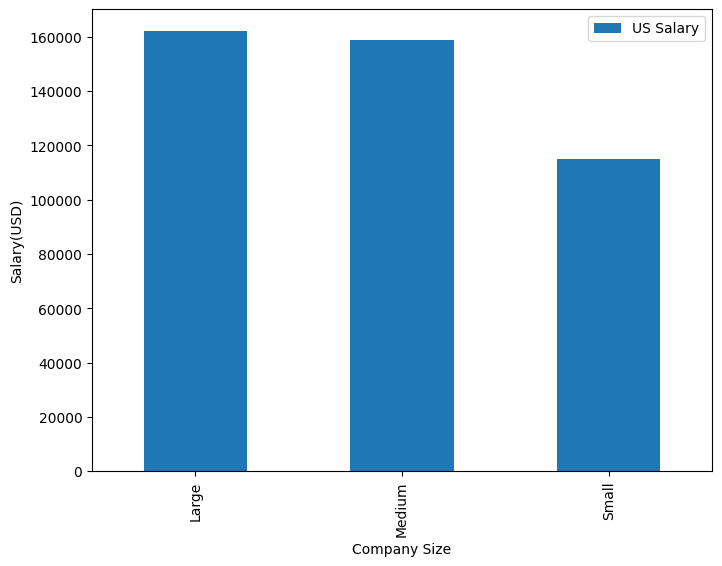

In [13]:
#Average Salary across Paid by Size of Organizations in USA
fig, ax = plt.subplots()
comp_size_df_us.set_index('company_size').plot(kind = 'bar', ax = ax,  xlabel = "company_size", ylabel = "salary_in_usd", figsize = (8,6))
ax.legend(["US Salary"])
ax.set(xlabel='Company Size', ylabel='Salary(USD)')
# Save the figure
fig.savefig("Images/Fig3.png")


In [14]:
# Compare Salaries out side of USA by Company Size
non_us_df  = df[df['company_location'] != 'US']
by_cmop_size_non_us = non_us_df.replace({"company_size": {'L': 'Large', 'M': 'Medium', 'S': 'Small'}}).groupby("company_size")
comp_size_df_non_us = by_cmop_size_non_us.mean("salary_in_usd")["salary_in_usd"].round(2).reset_index()
comp_size_df_non_us = comp_size_df_non_us.sort_values("salary_in_usd" , ascending  = False)
comp_size_df_non_us

,company_size,salary_in_usd
1,Medium,102492.27
0,Large,72473.49
2,Small,71223.03


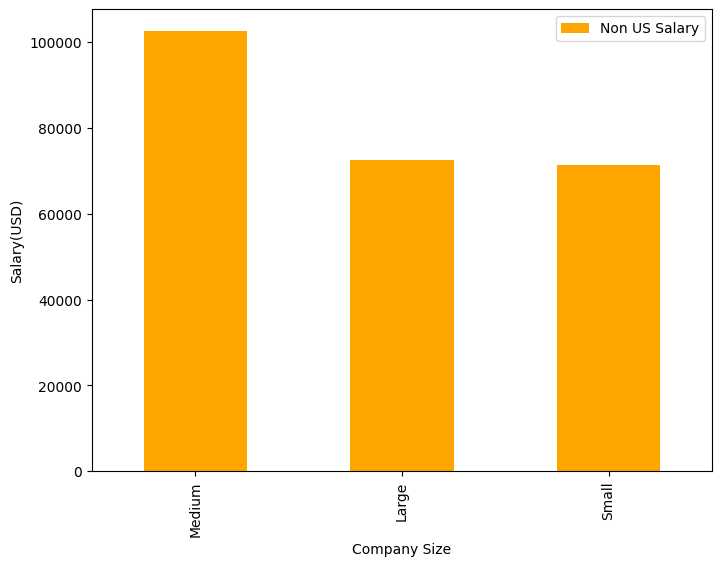

In [15]:
#Average Salary paid by Size of Organizations in nations other than USA
fig, ax = plt.subplots()
comp_size_df_non_us.set_index('company_size').plot(kind = 'bar', ax = ax, xlabel = "company_size", ylabel = "salary_in_usd", color= 'orange', figsize = (8,6))
ax.legend(["Non US Salary"])
ax.set(xlabel='Company Size', ylabel='Salary(USD)')

# Save the figure
fig.savefig("Images/Fig4.png")


In [16]:
# Compare USA vs Non USA Salries by Size of Organizations
us_vs_nonus_size_df = pd.merge(comp_size_df_us, comp_size_df_non_us,on = 'company_size', how = 'left')
us_vs_nonus_size_df


,company_size,salary_in_usd_x,salary_in_usd_y
0,Large,161974.45,72473.49
1,Medium,158835.53,102492.27
2,Small,115082.27,71223.03


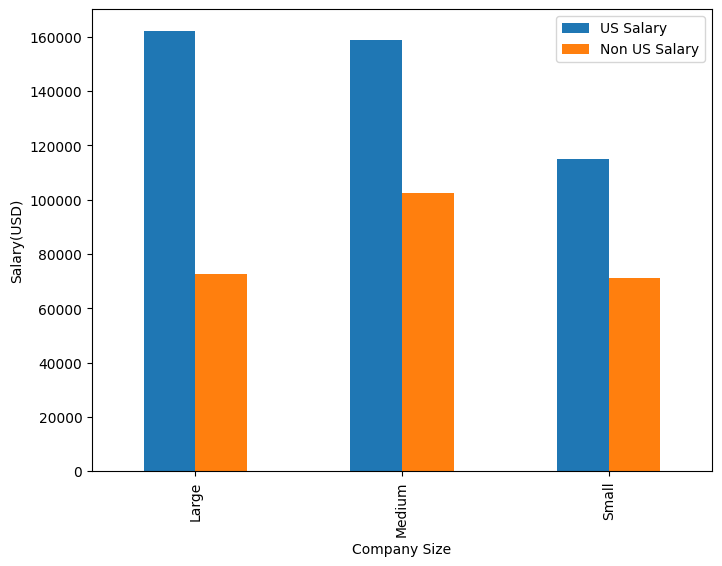

In [17]:
fig, ax = plt.subplots()
us_vs_nonus_size_df.set_index('company_size').plot(kind = 'bar', ax = ax, xlabel = "company_size", ylabel = "salary_in_usd", figsize = (8,6))
ax.legend(["US Salary","Non US Salary"])
ax.set(xlabel='Company Size', ylabel='Salary(USD)')
# Save the figure
fig.savefig("Images/Fig5.png")
